## Styles

**earthkit-maps** provides a flexible interface for defining and applying styles to your plots.

### The `Style` class - basic styles

To define a style in **earthkit-maps**, instantiate a `Style` object. The core (optional) arguments this can take are:
- `colors`: either a list of named colours or a [named matpltolib colormap](https://matplotlib.org/stable/gallery/color/colormap_reference.html).
- `levels`: either a list of levels, or an `earthkit.maps.styles.levels.Levels` object (we'll come to this later in the tutorial!). If no levels are passed, then suitable levels will be calculated based on your input data.
- `units`: the units of the provided levels. If a `Style` is defined with some associated units, then any data plotted with that `Style` will be converted to the `Style` units.

Let's get some sample data that we can use to experiment with different styles.

In [1]:
import earthkit.maps
import earthkit.data

In [2]:
data = earthkit.data.from_source(
    "cds", "reanalysis-era5-single-levels-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "variable": "2m_temperature",
        "year": "1993",
        "month": "12",
        "time": "00:00",
    },
)

Let's define a very simple style that we can use to plot this data.

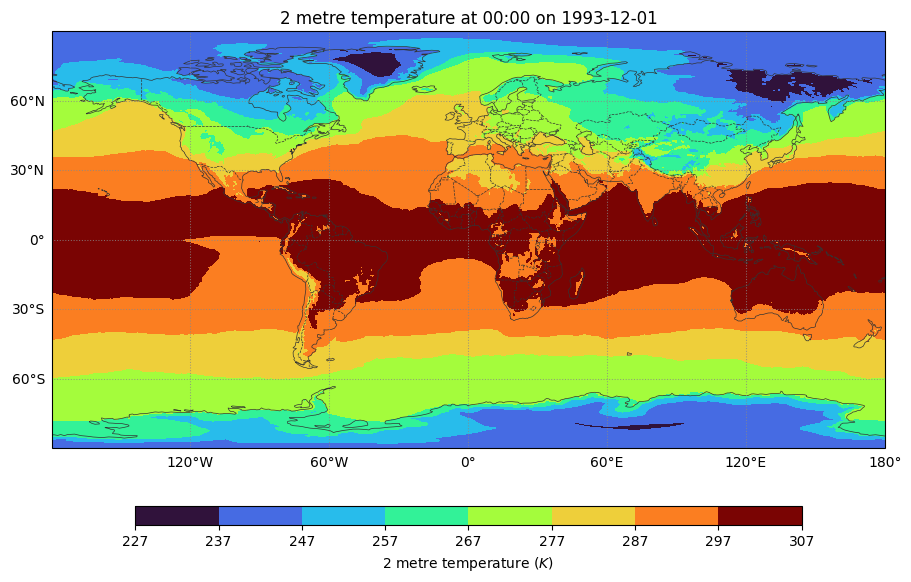

In [3]:
style = earthkit.maps.Style(colors="turbo")
earthkit.maps.quickplot(data, style=style)

This has given us a quick look at the data using some automatically-generated levels, and has even generated an automatic label, including the units of the data (Kelvin). Now let's say we want to:
- convert the units to celsius
- use a level range from -40 to +30 in steps of 2

We can easily tweak our style to accommodate our needs by adding the `units` and `levels` arguments:

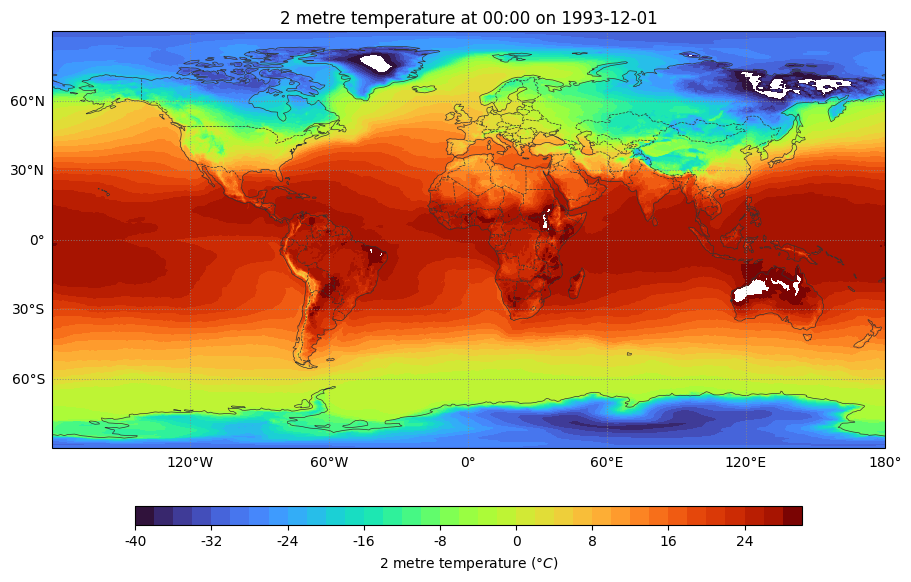

In [4]:
style = earthkit.maps.Style(
    colors="turbo",
    levels=range(-40, 31, 2),
    units="celsius",
)
earthkit.maps.quickplot(data, style=style)

This looks nice, but we have quite a lot of values which fall outside the range of the colour scale, for example over Greenland and Australia. We can fix this by extending the `Style` to capture any values which fall outside the range with the `extend` argument:

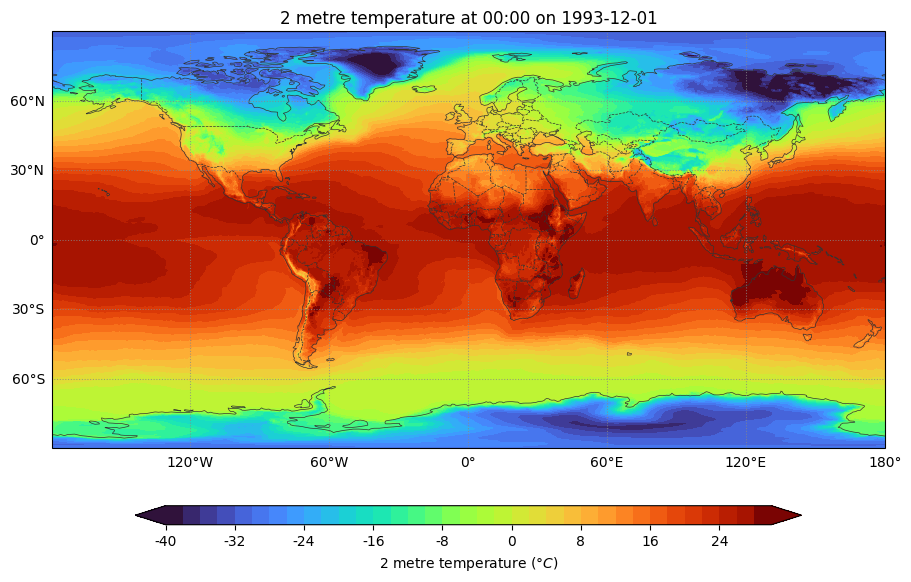

In [5]:
style = earthkit.maps.Style(
    colors="turbo",
    levels=range(-40, 31, 2),
    units="celsius",
    extend="both",  # "max" and "min" are also valid to extend the range in one direction
)
earthkit.maps.quickplot(data, style=style)

### More complex styles

#### Pressure isobars with a set interval

Sometimes we don't want to define a specific set of levels for plotting our data, but we might know the *interval* we would like to see between each level. A common use case for this kind of style is pressure isobars - so let's start by retrieving some ERA5 pressure data.

In [6]:
data = earthkit.data.from_source(
    "cds", "reanalysis-era5-single-levels-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "variable": "mean_sea_level_pressure",
        "year": "1993",
        "month": "12",
        "time": "00:00",
    },
)

**earthkit-maps** provides a `Levels` class for defining more complex levels. This class can take extra arguments like the `step` or interval between each level, and a `reference` point for calibrating the levels:

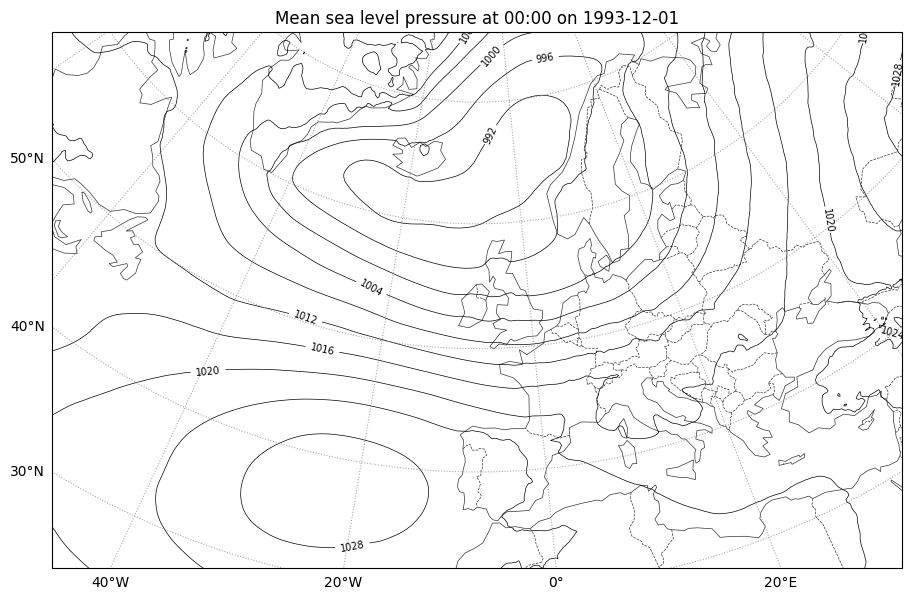

In [7]:
from earthkit.maps.styles.levels import Levels

style = earthkit.maps.styles.Contour(
    line_colors="black",
    levels=Levels(step=4, reference=1000),
    units="hPa",
    labels=True,
    legend_style=None,  # this means no legend will be generated for this style by default
)
earthkit.maps.quickplot(data, domain="North Atlantic", style=style)

#### Hatched styles

Hatched styles are also easy to implement by using the dedicated `Hatched` class. This takes a list of [hatch styles](https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html) alongside the usual `Style` arguments.

In [8]:
data = earthkit.data.from_source("url", "https://get.ecmwf.int/repository/test-data/metview/gallery/efi.grib")
fgi = data.sel(shortName="10fgi")

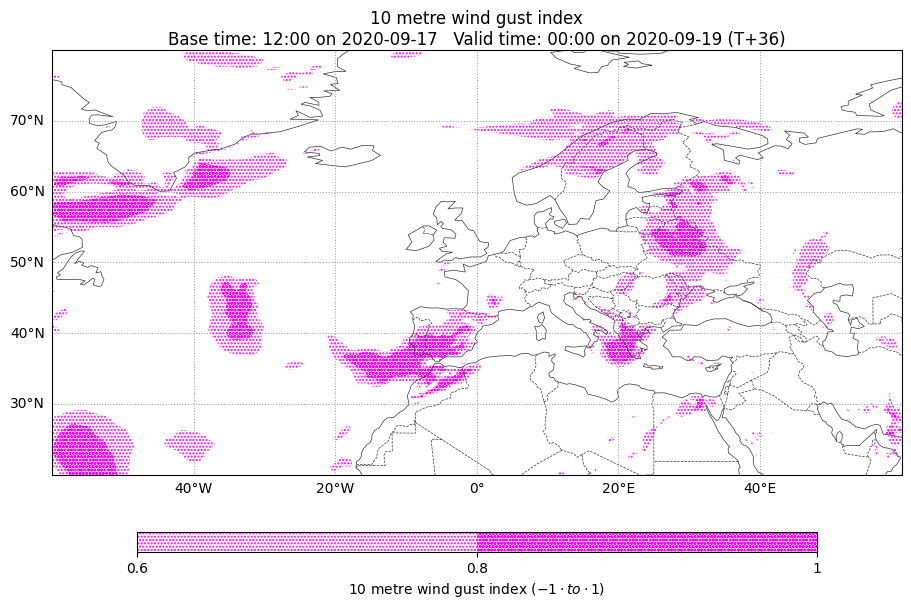

In [9]:
fgi_style = earthkit.maps.styles.Hatched(
    colors="magenta",
    levels=[0.6, 0.8, 1.0],
    hatches=["."*5, "o"*5],
)
earthkit.maps.quickplot(fgi, style=fgi_style)

#### Legend styles

We can also control the default legend type directly in the definition of the style:

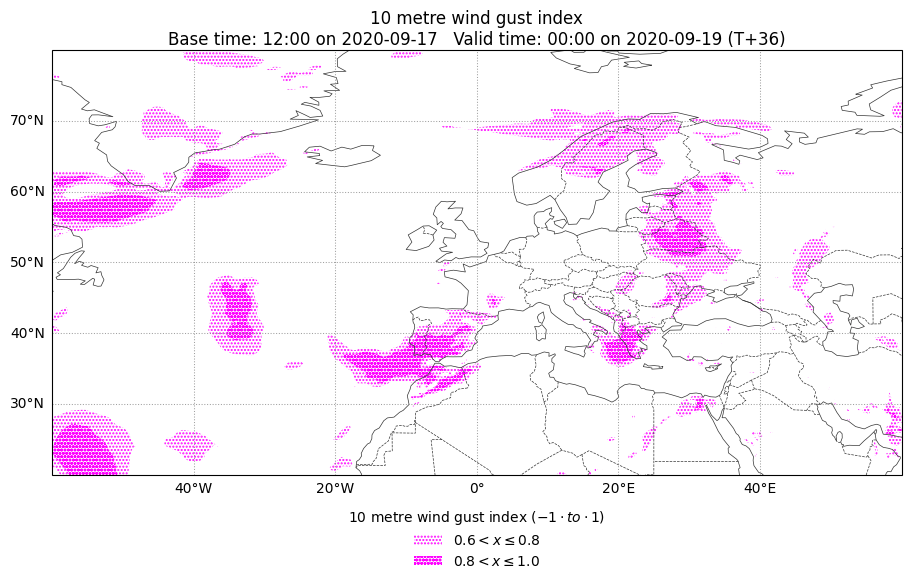

In [10]:
fgi_style = earthkit.maps.styles.Hatched(
    colors="magenta",
    levels=[0.6, 0.8, 1.0],
    hatches=["."*5, "o"*5],
    legend_style="disjoint",  # individual categorical colours
)
earthkit.maps.quickplot(fgi, style=fgi_style)

### Saving standalone legends

Sometimes it can be useful to generate the legend associated with a style on its own. This is easy to achieve by calling the `Style.save_legend_graphic` method.

In [11]:
style = earthkit.maps.Style(
    colors="turbo",
    levels=range(-40, 31, 2),
    units="celsius",
    extend="both",
)

style.save_legend_graphic("legend.png")

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
2023-11-20 12:05:25,429 WARNING Cannot find a wrapper for class: builtins.list, returning unwrapped object


![](legend.png)

In [12]:
style.save_legend_graphic("legend-label.png", label="temperature ({units})")

2023-11-20 12:05:25,540 WARNING Cannot find a wrapper for class: builtins.list, returning unwrapped object


![](legend-label.png)

However, note that `Style`s which use dynamic levels will require that you pass some `data` to the `save_legend_graphic` function:

### `Style.values_to_colors`

It's also possible to convert a value or list of values to colours based on a specific `Style`:

In [13]:
style.values_to_colors([10, 0])

array([[0.99672, 0.60977, 0.17842, 1.     ],
       [0.82333, 0.91253, 0.20663, 1.     ]])